In [1]:
from __future__ import division

import pandas as pd
import numpy as np
import math
from datetime import datetime, timedelta, date, time

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

%matplotlib inline

In [68]:
training_traj = pd.read_csv('dataSet_phase2/trajectories(table_5)_training2.csv')
test_traj2 = pd.read_csv('dataSet_phase2/trajectories(table 5)_test2.csv')

In [69]:
training_path = 'dataSets/training/'
test_path1 = 'dataSets/testing_phase1/'

In [70]:
training_vol_old = pd.read_csv(training_path+'volume(table 6)_training.csv')
test_vol1 = pd.read_csv(test_path1+'volume(table 6)_test1.csv')

In [71]:
training_vol = pd.read_csv('dataSet_phase2/volume(table 6)_training2.csv')
test_vol2 = pd.read_csv('dataSet_phase2/volume(table 6)_test2.csv')

In [72]:
training_vol_old.columns = training_vol.columns

In [73]:
training_vol = pd.concat([training_vol_old, training_vol])

In [74]:
def time_to_window(x):
    dt = datetime.strptime(x, "%Y-%m-%d %H:%M:%S")
    dtmin = int(dt.minute / 2) * 2
    dtwindow = datetime(dt.year, dt.month, dt.day, dt.hour, dtmin, 0)
    return dtwindow

In [75]:
def format_window(wd):
    return '[{},{})'.format(str(wd), str(wd+timedelta(minutes=2)))

In [78]:
training_vol['window'] = training_vol['date_time'].apply(time_to_window)

training_vol_group_count = \
training_vol.groupby(['tollgate','direction','window']).count()['date_time']

In [79]:
test_vol2['window'] = test_vol2['date_time'].apply(time_to_window)

test_vol_group_count = \
test_vol2.groupby(['tollgate','direction','window']).count()['date_time']

In [80]:
date_list2 = []

d1 = date(2016, 10, 25)  # start date
d2 = date(2016, 10, 31)  # end date

delta = d2 - d1         # timedelta

for i in range(delta.days + 1):
    date_list2.append(d1 + timedelta(days=i))






In [81]:
date_list = []

d1 = date(2016, 9, 19)  # start date
d2 = date(2016, 10, 24)  # end date

delta = d2 - d1         # timedelta

for i in range(delta.days + 1):
    date_list.append(d1 + timedelta(days=i))

give_time_list1 = [time(6,int(i)) for i in np.linspace(0,58,30)] + \
                  [time(7,int(i)) for i in np.linspace(0,58,30)]
pred_time_list1 = [time(8,int(i)) for i in np.linspace(0,58,30)] + \
                  [time(9,int(i)) for i in np.linspace(0,58,30)]

give_time_list2 = [time(15,int(i)) for i in np.linspace(0,58,30)] + \
                  [time(16,int(i)) for i in np.linspace(0,58,30)]
pred_time_list2 = [time(17,int(i)) for i in np.linspace(0,58,30)] + \
                  [time(18,int(i)) for i in np.linspace(0,58,30)]

In [82]:
tiid2 = ['10']*7 + ['11']*7 + ['20']*7 + ['30']*7 + ['31']*7
dlid2 = date_list2*5

In [84]:
df_morning_test = pd.DataFrame((test_vol_group_count.values).reshape(-1,60)[::2])
df_night_test = pd.DataFrame((test_vol_group_count.values).reshape(-1,60)[1::2])
df_morning_test['ti'] = tiid2
df_morning_test['dl'] = dlid2
df_night_test['ti'] = tiid2
df_night_test['dl'] = dlid2
df_morning_test['wkwn'] = [1,1,1,1,0,0,1]*5
df_morning_test['wkwn'] *= 35

df_night_test['wkwn'] = [1,1,1,1,0,0,1]*5
df_night_test['wkwn'] *= 35

ValueError: total size of new array must be unchanged

In [93]:
def interpolate_missing_window(x):
    ss = [(i-datetime(1970,1,1)).total_seconds() for i in x.index]
    tt = x.values
    ssall = np.linspace(ss[0], ss[-1], (ss[-1]-ss[0])/600+1)
    #print(len(ss), len(tt), len(ssall))
    ttall = np.interp(ssall, ss, tt)
    ssall = [int(i) for i in ssall]
    ssall = [datetime(1970,1,1)+timedelta(seconds=i) for i in ssall]
    return pd.Series(index=ssall, data=ttall)

In [94]:
first6 = np.array([])
next6 = np.array([])
for ti, d in [(1,0), (1,1), (2,0), (3,0), (3,1)]:
    mtmp = training_vol_group_count.loc[ti, d]
    #mtmp = interpolate_missing_window(mtmp)
    test6 = []
    for i in date_list:
        tmp = []
        for j in give_time_list1:
            try:
                tmp.append(mtmp[datetime.combine(i, j)])
            except:
                tmp.append(0)
        test6.append(tmp)
    result6 = test6
    first6 = np.append(first6, result6)
    
    test6 = []
    for i in date_list:
        tmp = []
        for j in pred_time_list1:
            try:
                tmp.append(mtmp[datetime.combine(i, j)])
            except:
                tmp.append(0)
        test6.append(tmp)
    result6 = test6
    next6 = np.append(next6, result6)

morning_volume66 = np.append(first6.reshape(-1,60), next6.reshape(-1,60), axis=1)

In [95]:
first6 = np.array([])
next6 = np.array([])
for ti, d in [(1,0), (1,1), (2,0), (3,0), (3,1)]:
    mtmp = training_vol_group_count.loc[ti, d]
    #mtmp = interpolate_missing_window(mtmp)
    test6 = []
    for i in date_list:
        tmp = []
        for j in give_time_list2:
            try:
                tmp.append(mtmp[datetime.combine(i, j)])
            except:
                tmp.append(0)
        test6.append(tmp)
    result6 = test6
    first6 = np.append(first6, result6)
    
    test6 = []
    for i in date_list:
        tmp = []
        for j in pred_time_list2:
            try:
                tmp.append(mtmp[datetime.combine(i, j)])
            except:
                tmp.append(0)
        test6.append(tmp)
    result6 = test6
    next6 = np.append(next6, result6)

night_volume66 = np.append(first6.reshape(-1,60), next6.reshape(-1,60), axis=1)

In [96]:
df_morning = pd.DataFrame(morning_volume66)

df_night = pd.DataFrame(night_volume66)

In [102]:
tiid = ['10']*36 + ['11']*36 + ['20']*36 + ['30']*36 + ['31']*36
dlid = date_list*5

In [103]:
df_morning['ti'] = tiid
df_morning['dl'] = dlid
df_night['ti'] = tiid
df_night['dl'] = dlid

In [104]:
holiday_list = []

d1 = date(2016, 10, 1)  # start date
d2 = date(2016, 10, 7)  # end date

delta = d2 - d1         # timedelta

for i in range(delta.days + 1):
    holiday_list.append(d1 + timedelta(days=i))

In [105]:
df_morning2 = df_morning[~df_morning['dl'].isin(holiday_list)]
df_night2 = df_night[~df_night['dl'].isin(holiday_list)]

In [107]:
from sklearn.neighbors import KNeighborsRegressor

In [108]:
def pred_loss(x_pred, x_true):
    x_pred = np.array(x_pred).reshape(-1,10).sum(axis=1)
    x_true = np.array(x_true).reshape(-1,10).sum(axis=1)
    #print(x_true)

    return (abs(x_pred-x_true)/x_true).mean()

In [266]:
df_morning2['wkwn'] = ([1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1]+[1,1,1,1,0,0,1])*5
df_morning2['wkwn'] *= 0

/Users/yutao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/yutao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [267]:
date_train = df_morning2['dl'].unique()[:-7]

df_morning2_train = df_morning2[df_morning2['dl'].isin(date_train)]
df_morning2_valid = df_morning2[~df_morning2['dl'].isin(date_train)]

In [268]:
X = df_morning2_train.iloc[:,(range(60)+[-1])]#.values
#y = df_morning2_train.iloc[:,6:12]#.values
y = df_morning2_train.iloc[:,list(range(60,120))]

In [273]:
Xv = df_morning2_valid.iloc[:,(range(60)+[-1])]

In [281]:
X.iloc[:,:-1] = [wv_smooth(i) for i in X.iloc[:,:-1].values]

/Users/yutao/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [282]:
Xv.iloc[:,:-1] = [wv_smooth(i) for i in Xv.iloc[:,:-1].values]

In [285]:
neigh = KNeighborsRegressor(n_neighbors=9, weights='distance')
neigh.fit(X, y)
# for _ in range(3):
#     y = 0.1*y + 0.9*neigh.predict(X)
#     neigh.fit(X, y)
    

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=9, p=2,
          weights='distance')

In [286]:
pred_loss(np.vectorize(round)(neigh.predict(Xv)-0.3), 
          df_morning2_valid.iloc[:,list(range(60,120))])

0.33743085847774906

In [ ]:
def distance_func(a, b):
    

In [226]:
neigh = KNeighborsRegressor(n_neighbors=9, 
                            algorithm='brute',
                            weights='distance',
                            metric=distance_func)
neigh.fit(X, y)

KNeighborsRegressor(algorithm='brute', leaf_size=30,
          metric=<function distance_func at 0x11c3efb18>,
          metric_params=None, n_jobs=1, n_neighbors=9, p=2,
          weights='distance')

In [227]:
pred_loss(np.vectorize(round)(neigh.predict(df_morning2_valid.iloc[:,(range(60)+[-1])])-0.3), 
          df_morning2_valid.iloc[:,list(range(60,120))])

0.17851923770503833

In [97]:
df_morning_cumsum = df_morning.iloc[:,:60].values.cumsum(axis=1)

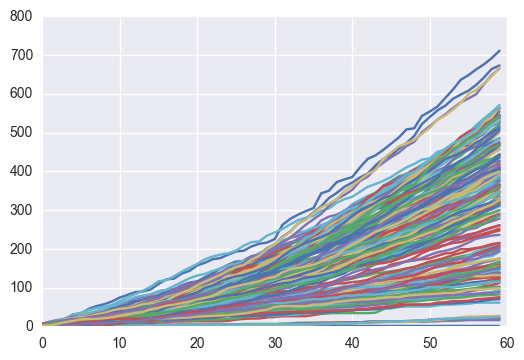

In [98]:
for i in df_morning_cumsum:
    if i[-1]<800:
        plt.plot(i)

In [132]:
from scipy import integrate

In [133]:
integrate.quad(lambda x: x**2, 1,3)

(8.666666666666668, 9.621932880084691e-14)

In [271]:
def wv_smooth(x):
    wtx = wt(x,_,'db4',3,2,3)
    return wtx -  np.append(0, wtx[:-1])


In [225]:
def distance_func(a, b):
    coef_a = np.polyfit(range(60), a[:-1], 4)
    coef_b = np.polyfit(range(60), b[:-1], 4)
    def func_for_integrate(x):
        return (4*x**3*(coef_a[0]-coef_b[0])+\
                3*x**2*(coef_a[1]-coef_b[1])+\
                2*x**1*(coef_a[2]-coef_b[2])+\
                1*x**0*(coef_a[3]-coef_b[3])) ** 2
    return np.sqrt(integrate.quad(func_for_integrate, 0, 60)[0])

In [151]:
def coef_pred(coef, x):
    return coef[0]*x**4+coef[1]*x**3+coef[2]*x**2+coef[3]*x

In [150]:
np.polyfit(range(1,60), df_morning_cumsum[27][1:]/range(1,60), 3)

array([ -3.24663669e-05,   4.36835687e-03,  -1.40740390e-01,
         1.82931207e+00])

In [130]:
?np.polyfit

/Users/yutao/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


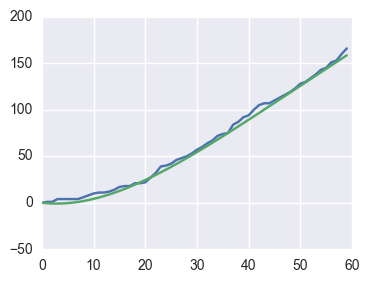

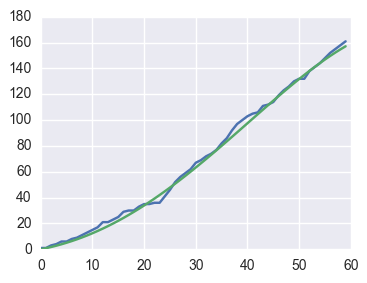

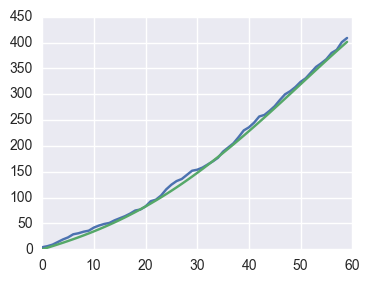

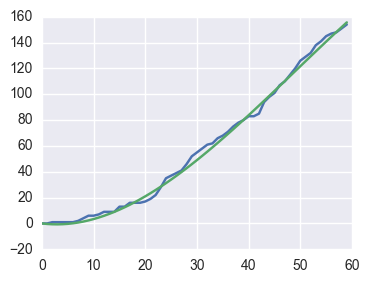

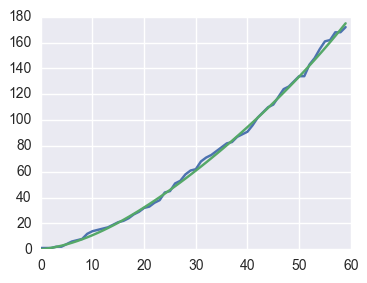

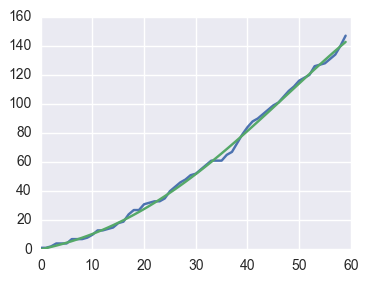

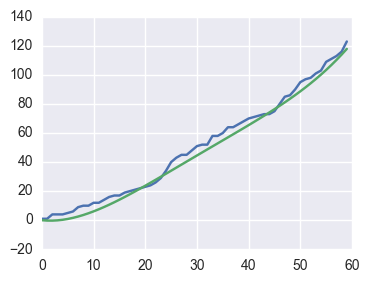

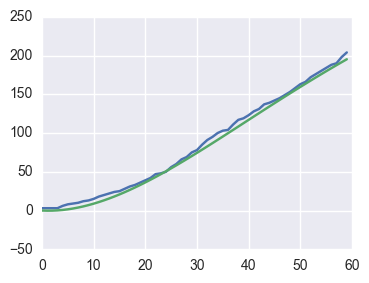

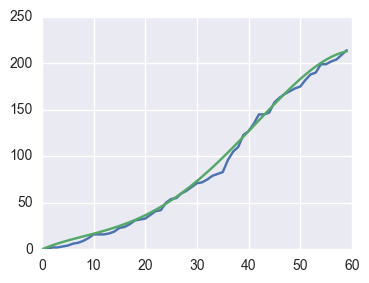

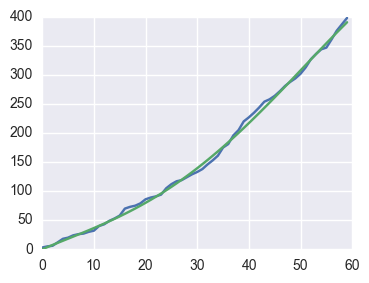

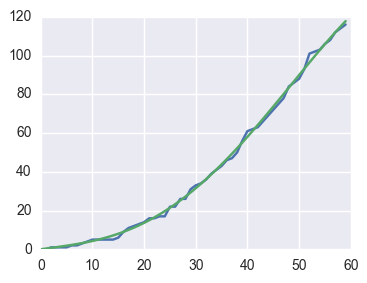

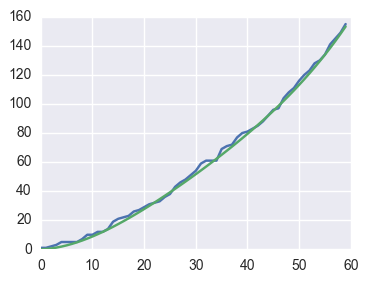

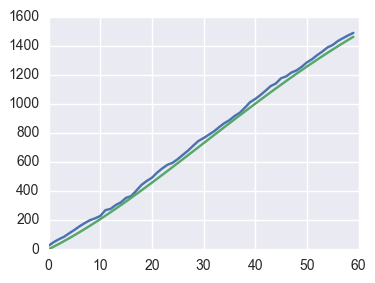

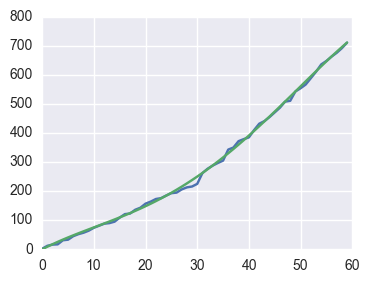

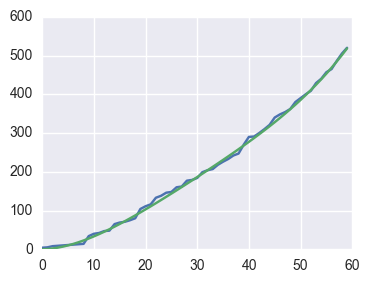

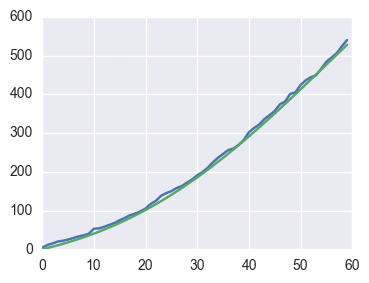

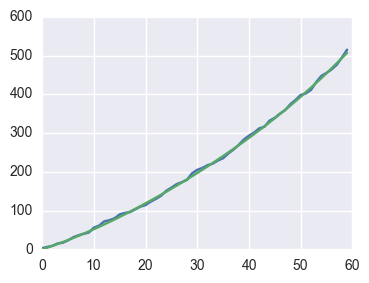

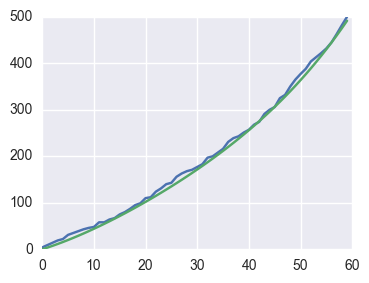

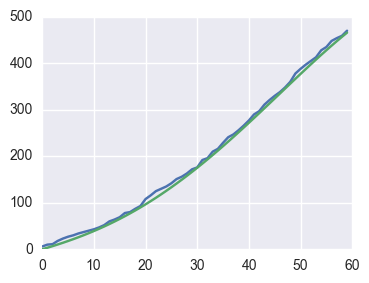

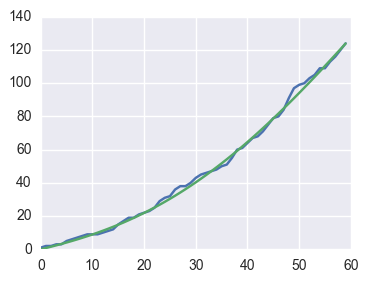

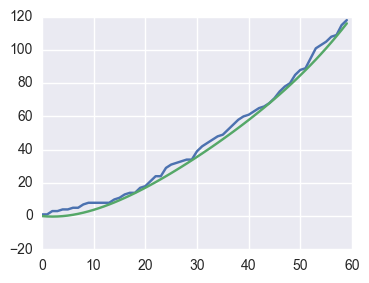

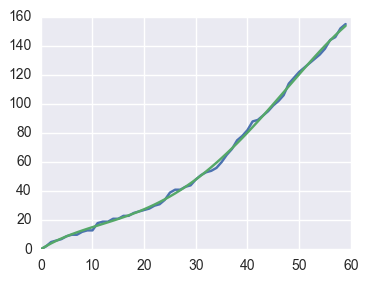

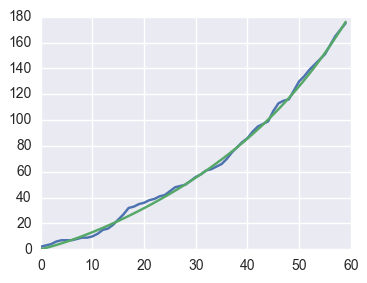

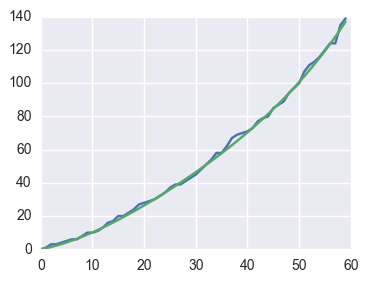

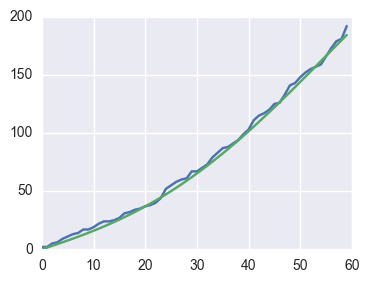

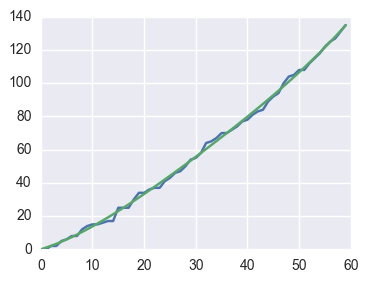

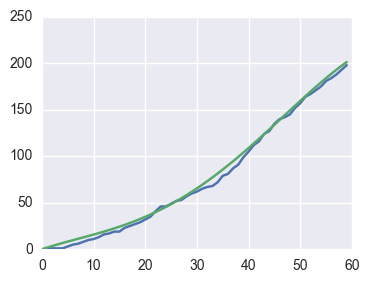

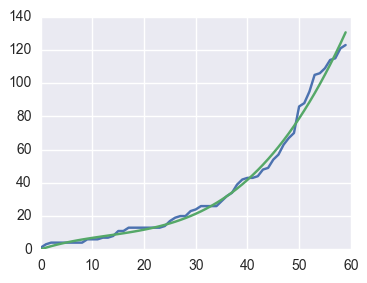

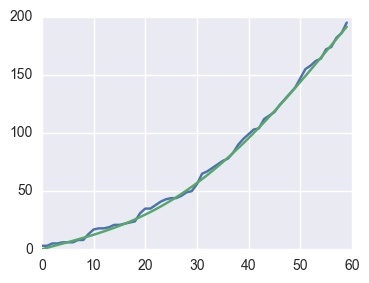

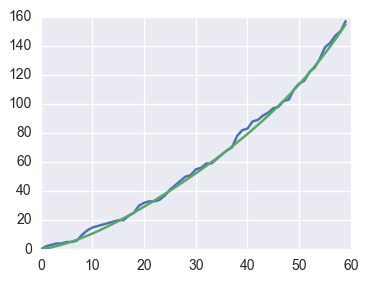

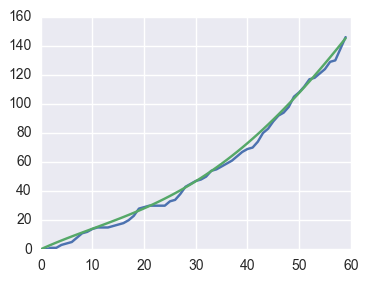

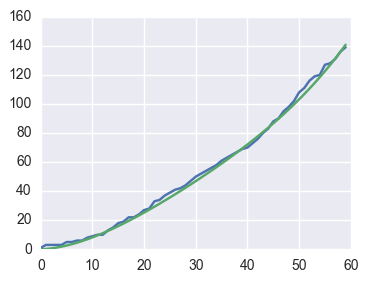

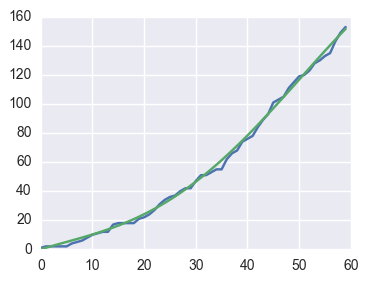

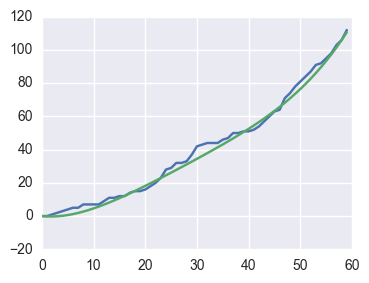

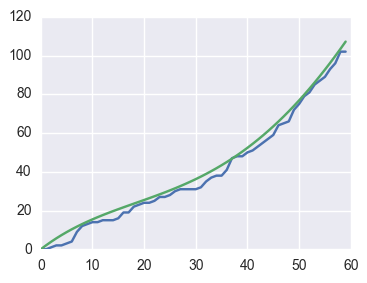

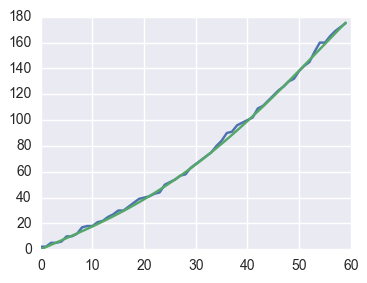

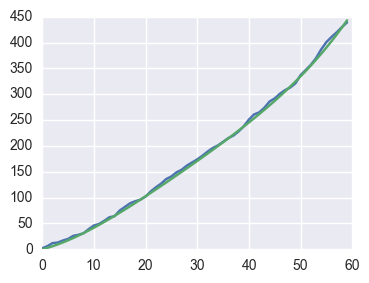

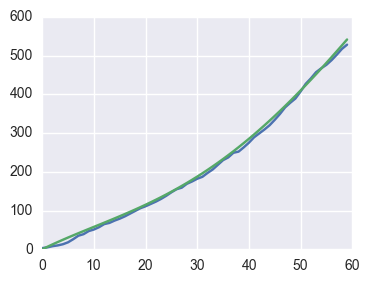

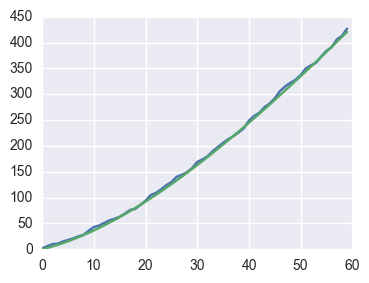

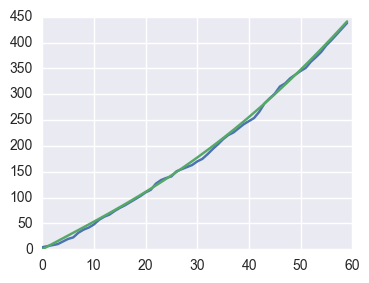

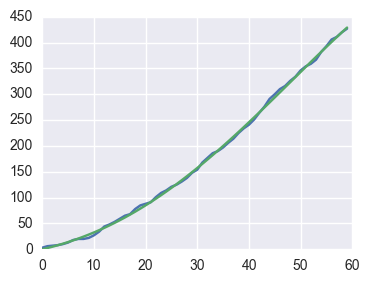

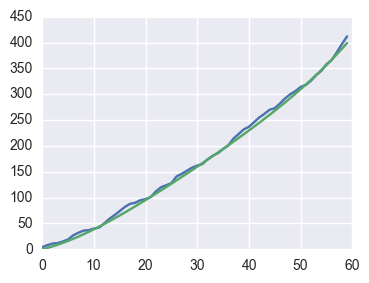

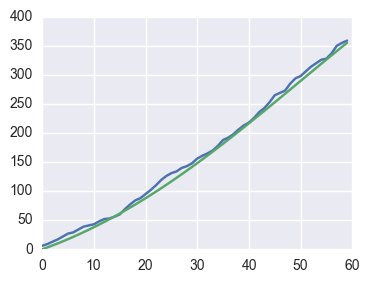

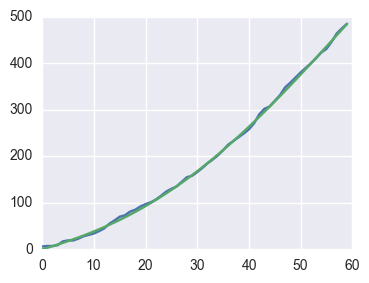

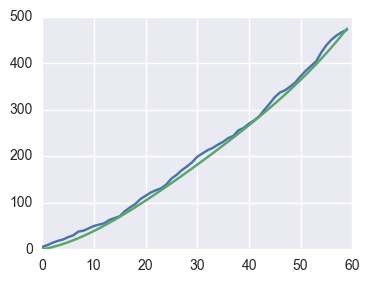

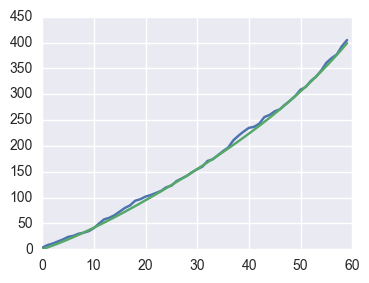

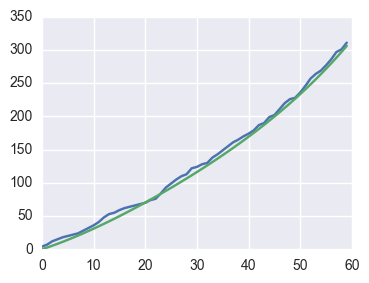

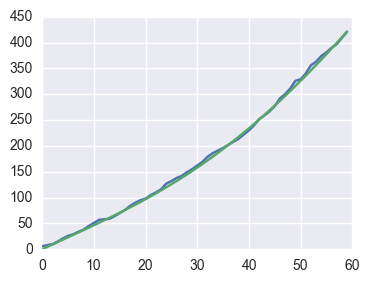

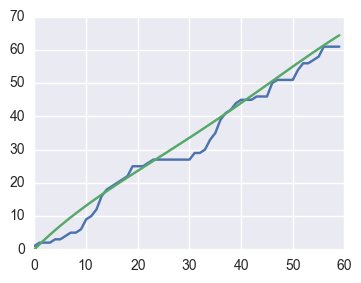

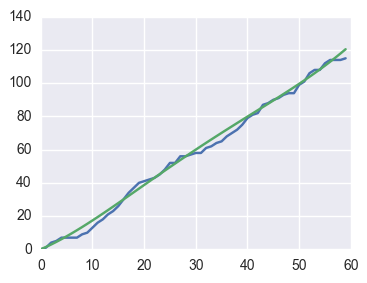

In [174]:
for i in range(50):
    coef = np.polyfit(range(60), df_morning_cumsum[i], 4)
    plt.figure(figsize=(4,3))
    plt.plot(df_morning_cumsum[i])
    plt.plot([coef_pred(coef, j) for j in range(60)])

In [175]:
import pywt

In [192]:
def wt(index_list,data,wavefunc,lv,m,n):   
    # 打包为函数，方便调节参数。  lv为分解层数；data为最后保存的dataframe便于作图；index_list为待处理序列；wavefunc为选取的小波函数；m,n则选择了进行阈值处理的小波系数层数
    # 分解
    coeff = pywt.wavedec(index_list,wavefunc,mode='sym',level=lv)   
    # 按 level 层分解，使用pywt包进行计算， cAn是尺度系数 cDn为小波系数
    sgn = lambda x: 1 if x > 0 else -1 if x < 0 else 0 # sgn函数
    # 去噪过程
    for i in range(m,n+1):   # 选取小波系数层数为 m~n层，尺度系数不需要处理
        cD = coeff[i]
        for j in range(len(cD)):
            Tr = np.sqrt(2*np.log(len(cD)))  # 计算阈值
            if cD[j] >= Tr:
                coeff[i][j] = sgn(cD[j]) - Tr  # 向零收缩
            else:
                coeff[i][j] = 0   # 低于阈值置零

    # 重构
    denoised_index = pywt.waverec(coeff,wavefunc)
    return denoised_index
    
    # 在原dataframe中添加处理后的列便于画图
#     data['denoised_index']=pd.Series('x',index=data.index)
#     for i in range(len(data)):
#         data['denoised_index'][i] = denoised_index[i] 
#     # 画图

#     data = data.set_index(data['tradeDate'])
#     data.plot(figsize=(20,20),subplots=(2,1))
#     data.plot(figsize=(20,10))

# 调用函数wt
denoised = wt(index_list,data,'db4',3,2,3)

In [219]:
wtd = wt(data,_,'db4',3,2,3)
wtd -  np.append(0, wtd[:-1])

array([  9.8833029 ,   2.93840956,   2.10114032,   0.6491179 ,
         3.49867563,   5.81969863,   4.51293814,   3.71065101,
         5.17337891,   6.11420591,   2.90375   ,   6.76538943,
         4.75190064,   4.97770562,   5.20678328,   5.38930126,
         5.30452648,   5.26961082,   6.61962265,   8.06344312,
         8.87056395,  10.05674227,   8.48547387,   6.67213742,
         7.95569535,   8.66328549,   7.76779498,   7.23707642,
         7.18853551,   6.9211312 ,   8.89214125,  11.12087351,
        12.1896938 ,  13.9044446 ,  11.05472353,   7.78979691,
         8.57529915,   8.28921647,  10.39381925,  13.25133806,
        10.82672655,  16.04766202,  12.54942745,  11.06597634,
        11.86412569,  11.95013686,  10.129136  ,  15.57686856,
        11.03814567,  16.18695069,   9.13400195,  11.0190102 ,
        10.33324114,  11.50063226,   9.89154463,  15.8810014 ,
        16.71099728,  20.64941219,  12.26739399,   3.29113943])

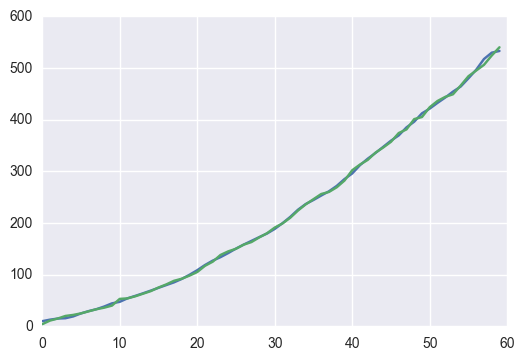

In [214]:
data = df_morning_cumsum[15]
plt.plot(wt(data,data,'db4',3,2,3))
plt.plot(data)

In [37]:
dfmm = np.array(df_morning.mean())
dfnm = np.array(df_night.mean())


In [88]:
df_morning_ad4 = \
sum([df_morning.iloc[:,(i):(56+i)].values for i in range(5)])

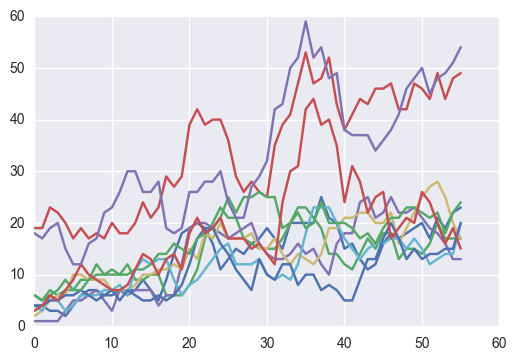

In [90]:
for i in range(10):
    plt.plot(df_morning_ad4[i])

In [93]:
sis = dfmm[4:]+dfmm[3:-1]+dfmm[2:-2]+dfmm[1:-3]+dfmm[:-4]

In [94]:
coef3 = np.polyfit(range(len(sis)), sis, 2)

In [95]:
def coef_pred(coef, x):
    return coef[0]*x**2+coef[1]*x**1+coef[2]+coef[3]*0

IndexError: index 3 is out of bounds for axis 0 with size 3

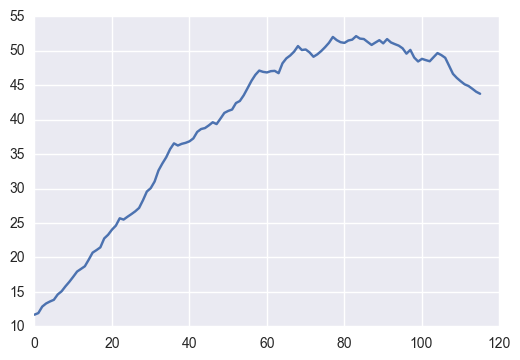

In [96]:
plt.plot(dfmm[4:]+dfmm[3:-1]+dfmm[2:-2]+dfmm[1:-3]+dfmm[:-4])
plt.plot(range(len(sis)), [coef_pred(coef3, x) for x in range(len(sis))])

In [85]:
(dfmm[4:]+dfmm[3:-1]+dfmm[2:-2]+dfmm[1:-3]+dfmm[:-4]).shape

(116,)